# Lezione 12

## Dario Pullia

Usiamo le reti neurali per risolvere un **problema di classificazione**, in particolare scegliamo di usare il database del MNIST che è composto da 70000 immagini 28x28 pixel in scala di grigi rappresentanti cifre da 0 a 9.

### Esercizio 12.1

Iniziamo affrontando il problema studiando la variazione di performance al variare del numero di epoche per cui si è allenato il sistema.



#### Implementazione

La rete neurale è composta da 4 layer: 

- Input 28x28 neuroni, A.F. *relu*
- 400 neuroni, A.F. *relu*
- 100 neuroni, A.F. *relu*
- output 10 neuroni, A.F. *softmax*

L'ultimo layer dev'essere necessariamente limitato in modo da mappare l'output con le 10 cifre.

Inoltre intoduciamo un **dropout al 50%**, cioè una procedura per cui per ogni epoca una parte dei neuroni viene disattivata. Questo è utile per prevenire il fenomeno, detto *overfitting*, per cui il modello impara i singoli dati di training perdendo l'abilità di generalizzare.



Per motivi di efficienza, prima di allenare un nuovo modello si è controllato che non ne esistesse già uno uguale ma 'meno allenato' e in tal caso si è continuato l'allenamento su quello per il numero di epoche corretto.


In [39]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_random_seed(seed)


# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


10000/10000 [==============================] - 0s 38us/sample - loss: 0.1226 - acc: 0.9820


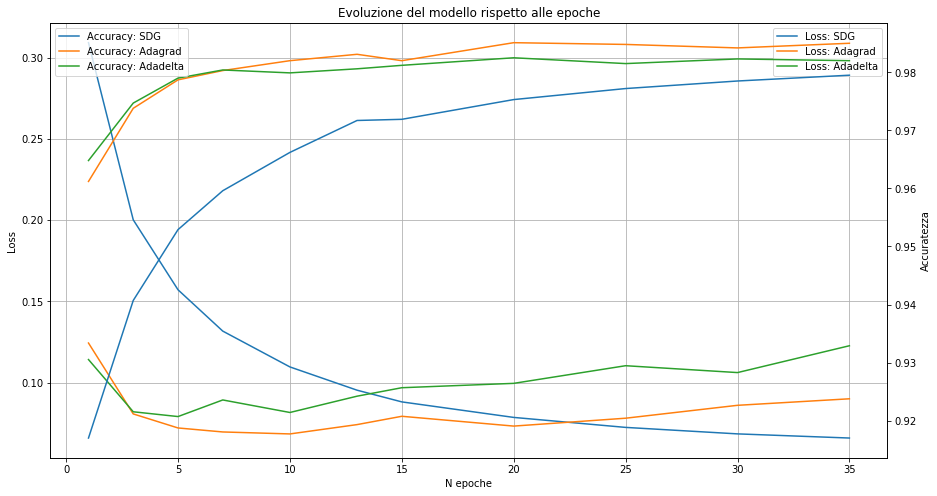

In [41]:

NEp=[1,3,5,7,10,13,15,20,25,30,35]
Loss=[]
Acc=[]
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()


for j in ['SDG','Adagrad','Adadelta']:
    Loss=[]
    Acc=[]
    for i in NEp:
        K.clear_session()
        path_to_file='data01/models/model_OPT_%s_NEp_%d.h5'%(j, i)
        model_DNN= keras.models.load_model(filepath=path_to_file)
        
        score = model_DNN.evaluate(X_test, Y_test, verbose=1)
        Loss.append(score[0])
        Acc.append(score[1])
    ax1.plot(NEp,Loss,label='Loss: %s'%j)
    ax2.plot(NEp,Acc,label='Accuracy: %s'%j)

ax1.set_title('Evoluzione del modello rispetto alle epoche')
ax1.set_xlabel('N epoche')
ax1.set_ylabel('Loss',)
ax2.set_ylabel('Accuratezza')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.grid()

plt.show()




Tra le loss functions testate notiamo che SDG funziona peggio di Adagrad e Adadelta. 
Negli ultimi due casi si può osservare l'effetto dell'overfitting notando la crescita della loss dopo circa 10 epoche. 

Scegliamo di studiare il caso Adagrad allenato per 7 epoche (batch size 32).

### Esercizio 12.2

Creiamo ora una rete convoluzionale, cioè manteniamo per una serie di passaggi la 'forma quadrata' delle immagini in input e introduciamo dei layer capaci di considerare pixel adiacenti che ci aspettiamo siano spesso correlati.


Testiamo varie configurazioni e le paragoniamo al miglior caso di sola DNN.

10000/10000 [==============================] - 0s 38us/sample - loss: 0.0696 - acc: 0.9803
data02/models/model_CNN_NConv_2_NDeep_0_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 3s 251us/sample - loss: 0.0569 - acc: 0.9820
data02/models/model_CNN_NConv_1_NDeep_1_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 180us/sample - loss: 0.0445 - acc: 0.9851
data02/models/model_CNN_NConv_0_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 153us/sample - loss: 0.0383 - acc: 0.9877
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_2_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 173us/sample - loss: 0.1323 - acc: 0.9640
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5
10000/10000 [==============================] - 2s 154us/sample - loss: 0.1642 - acc: 0.9561
data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_0_NAv

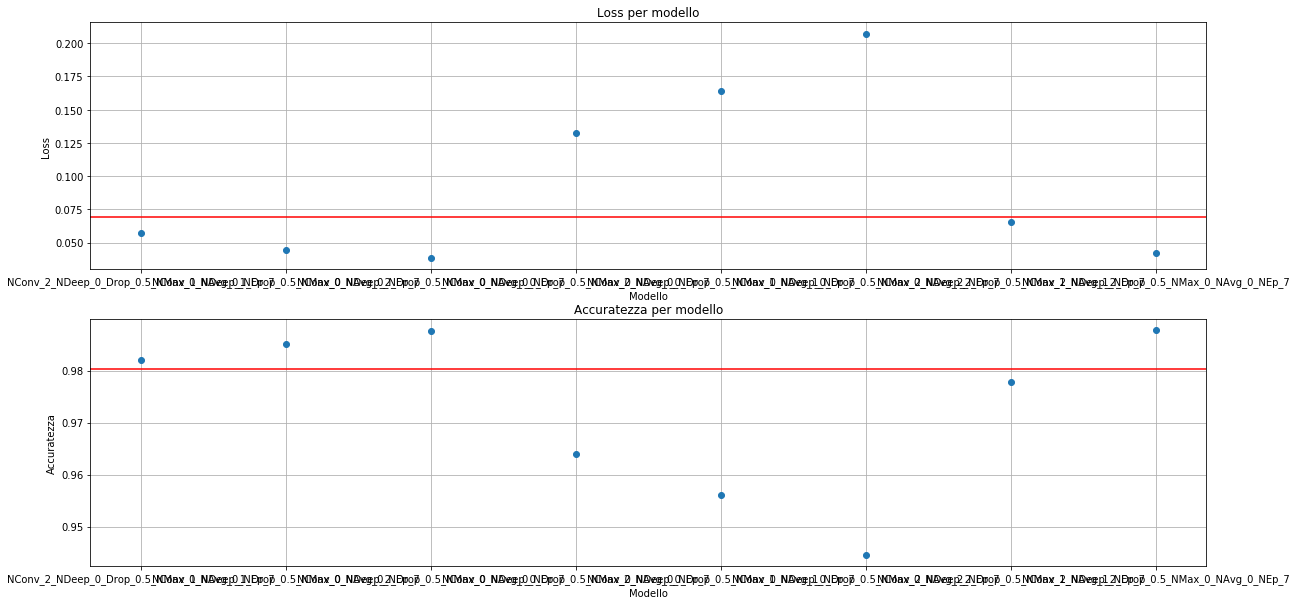

In [21]:

models=['data02/models/model_CNN_NConv_2_NDeep_0_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_1_NDeep_1_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_2_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5',
        'data02/models/model_CNN_NConv_0_NDeep_0_Drop_0.500000_NMax_0_NAvg_2_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_1_NAvg_1_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
       ]



Names=[ 'NConv_2_NDeep_0_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_1_NDeep_1_Drop_0.5_NMax_0_NAvg_0_NEp_7', 
        'NConv_0_NDeep_2_Drop_0.5_NMax_0_NAvg_0_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_2_NAvg_0_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_1_NAvg_1_NEp_7',
        'NConv_0_NDeep_0_Drop_0.5_NMax_0_NAvg_2_NEp_7',
        'NConv_2_NDeep_2_Drop_0.5_NMax_1_NAvg_1_NEp_7',
        'NConv_2_NDeep_2_Drop_0.5_NMax_0_NAvg_0_NEp_7',
         ]
       
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
path_to_benchmark='data01/models/model_OPT_Adagrad_NEp_7.h5'
model_DNN= keras.models.load_model(filepath=path_to_benchmark)

score = model_DNN.evaluate(X_test, Y_test, verbose=1)

Loss_Bench=score[0]
Acc_Bench=score[1]
Loss=[]
Acc=[]
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

for i in models:
        K.clear_session()
    
        path_to_file=i
        print(i)
        model_CNN= keras.models.load_model(filepath=path_to_file)
        score = model_CNN.evaluate(X_test, Y_test, verbose=1)
        Loss.append(score[0])
        Acc.append(score[1])
        
fig, ax = plt.subplots(2,1,figsize=(20, 10))

ax[0].plot(Names, Loss, marker='o',linestyle = '')
ax[0].grid(True)
ax[0].set_title('Loss per modello')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Modello')
#ax[0].legend()
ax[0].axhline(y =Loss_Bench , color = 'r', linestyle = '-')

ax[1].plot(Names, Acc, marker='o',linestyle = '')
ax[1].set_title('Accuratezza per modello')
ax[1].set_ylabel('Accuratezza')
ax[1].set_xlabel('Modello')
ax[1].grid(True)
#ax[1].legend()
ax[1].axhline(y =Acc_Bench , color = 'r', linestyle = '-')

plt.show()

In [19]:
path_to_benchmark='data02/models/model_CNN_NConv_0_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5'
model_CNN= keras.models.load_model(filepath=path_to_benchmark)
model_CNN.summary()

path_to_benchmark='data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5'
model_CNN= keras.models.load_model(filepath=path_to_benchmark)
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
flatten (Flatten)            (None, 5760)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               576100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 587,470
Trainable params: 587,470
Non-trainable params: 0
_________________________________________________________________
____

Osserviamo che il modello che performa meglio ha $N_{Conv}=1$ (solo il primo che riceve l'input) layer convoluzionali e $N_{Deep}=2$ layer lineari ed è anche quella con il maggior numero di parametri liberi.

Osserviamo anche che i layer di pooling abbassando il numero di parametri abbassano anche le performance dei modelli che li contiengono. Con un dataset ridotto probabilmente questa procedura renderebbe migliori questi modelli rispetto a quelli più dispendiosi in termini di parametri.


Di seguito studieremo il comportamento del secondo miglior modello con  $N_{Conv}=3$ e $N_{Deep}=2$ poichè è più veloce il processo di allenamento avendo meno della metà dei parametri liberi.

In primis controlliamo l'impatto del dropout sulle performace dei modelli.



data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.000000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 180us/sample - loss: 0.0367 - acc: 0.9879
data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.100000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 177us/sample - loss: 0.0411 - acc: 0.9891
data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0387 - acc: 0.9887
data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.300000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 173us/sample - loss: 0.0361 - acc: 0.9882
data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.400000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0384 - acc: 0.9880
data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5
10000/10000 [==============================] - 2s 172us/sample - loss: 0.0425 

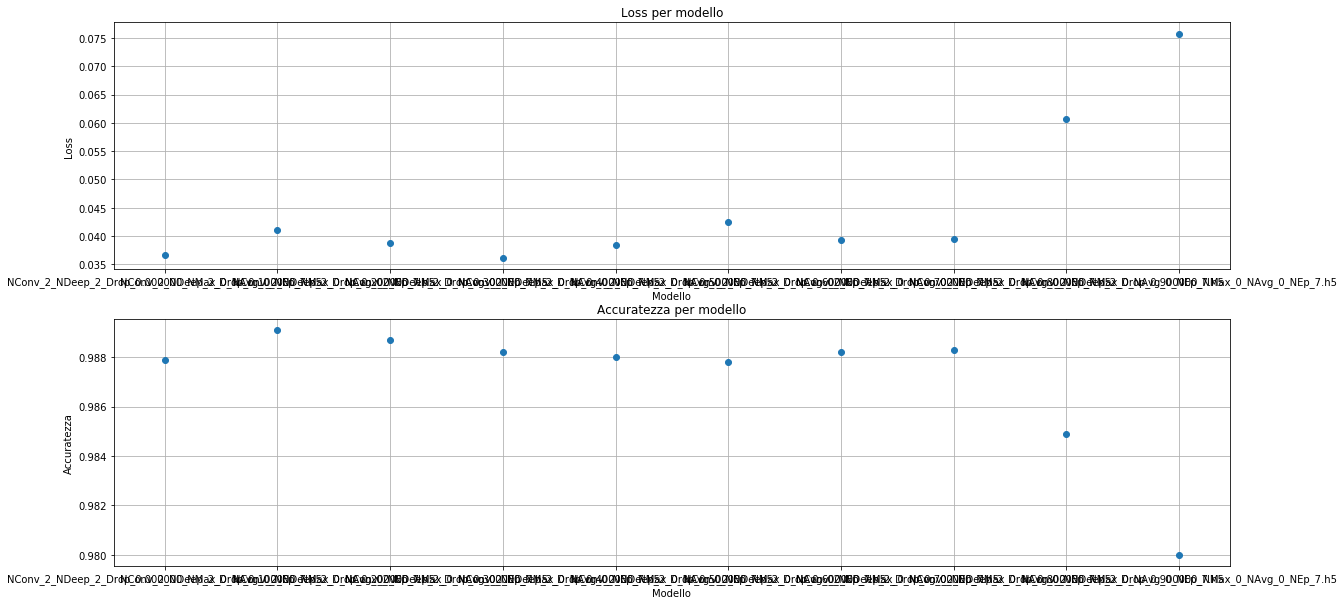

In [25]:
models=['data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.000000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.100000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.300000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.400000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.600000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.700000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.800000_NMax_0_NAvg_0_NEp_7.h5',
        'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.900000_NMax_0_NAvg_0_NEp_7.h5',
       ]
Names= ['NConv_2_NDeep_2_Drop_0.000000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.100000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.200000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.300000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.400000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.600000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.700000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.800000_NMax_0_NAvg_0_NEp_7.h5',
        'NConv_2_NDeep_2_Drop_0.900000_NMax_0_NAvg_0_NEp_7.h5',
       ]

Loss=[]
Acc=[]

for i in models:
        K.clear_session()
    
        path_to_file=i
        print(i)
        model_CNN= keras.models.load_model(filepath=path_to_file)
        score = model_CNN.evaluate(X_test, Y_test, verbose=1)
        Loss.append(score[0])
        Acc.append(score[1])
        
fig, ax = plt.subplots(2,1,figsize=(20, 10))

ax[0].plot(Names, Loss, marker='o',linestyle = '')
ax[0].grid(True)
ax[0].set_title('Loss per modello')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Modello')
#ax[0].legend()
#ax[0].axhline(y =Loss_Bench , color = 'r', linestyle = '-')

ax[1].plot(Names, Acc, marker='o',linestyle = '')
ax[1].set_title('Accuratezza per modello')
ax[1].set_ylabel('Accuratezza')
ax[1].set_xlabel('Modello')
ax[1].grid(True)
#ax[1].legend()
#ax[1].axhline(y =Acc_Bench , color = 'r', linestyle = '-')

plt.show()





Osserviamo che fino a dropout del 70% il comportamento dei modelli è stabile, superata questa soglia non si allenano abbastanza neuroni a ciclo e le performance calano. Questa stabilità può essere legata al fatto che con questo dataset e numero di parametri non si arriva mai a fare overfitting con 7 epoche di allenamento. 

In conclusione studiamo come il numero di epoche impatta le performance del modello, mantenendo il Dropout al 50%.

10000/10000 [==============================] - 2s 205us/sample - loss: 0.0622 - acc: 0.9880


<Figure size 576x576 with 0 Axes>

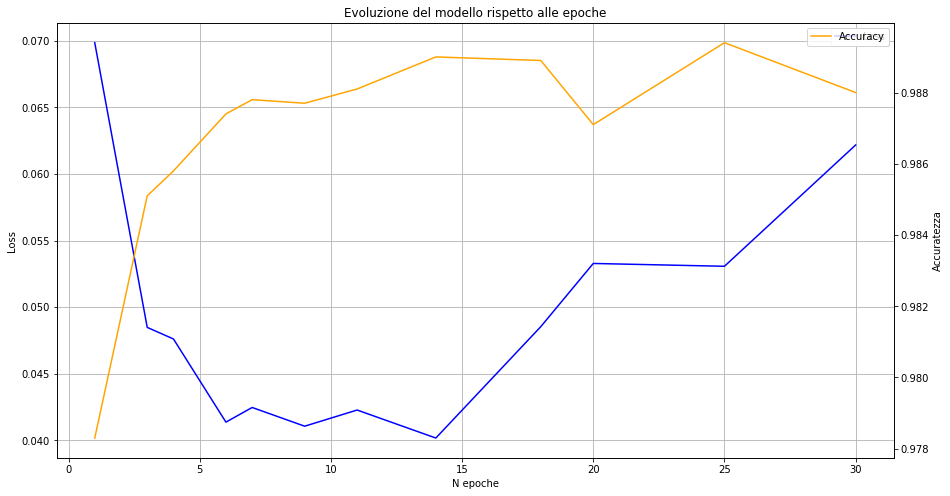

In [37]:

#NEp=[1,3]
NEp=[1,3,4,6,7,9,11,14,18,20,25,30]
Loss=[]
Acc=[]
fig = plt.figure(figsize=(8,8))
Loss=[]
Acc=[]

fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()

for i in NEp:
    K.clear_session()
    path_to_file='data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_%d.h5'%i
    model_DNN= keras.models.load_model(filepath=path_to_file)
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)
    Loss.append(score[0])
    Acc.append(score[1])

ax1.plot(NEp,Loss,label='Loss',color='b')
ax2.plot(NEp,Acc,label='Accuracy',color='orange')

ax1.set_title('Evoluzione del modello rispetto alle epoche')
ax1.set_xlabel('N epoche')
ax1.set_ylabel('Loss',)
ax2.set_ylabel('Accuratezza')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.grid()

plt.show()



Si nota un peggioramento della loss per $N_{epochs}>15$ con un andamento tipico dell'overfitting.



### Esercizio 12.3

Proviamo ad appilicare i modelli DNN e CNN su dati completamente nuovi, ovvero immagini $28 \times 28$ in scala di grigi delle 10 cifre prodotte in locale con software di disegno. 

Confronterò i due migliori modelli ottenuti nei due esercizi precedenti.


In [48]:
from PIL import Image
import os
my_digits=[]
for k in range(10):    

    digit_filename = "data03/mydigits/%d.png"%k
    digit_in = Image.open(digit_filename).convert('L')
    #digit_in = Image.open("8b.png").convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    
    my_digits.append(data)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
None


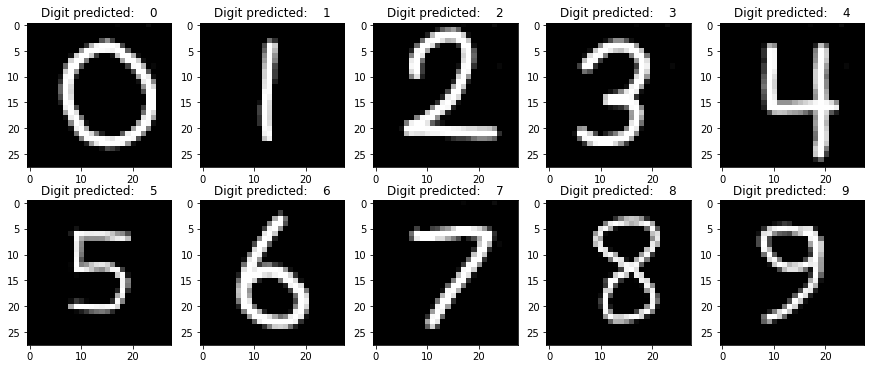

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 5)         455       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 5)         230       
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               200100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
__________

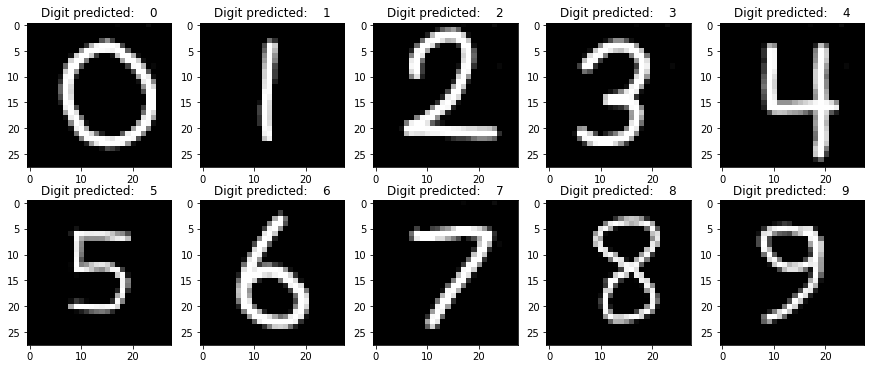

In [49]:
path_to_benchmark='data01/models/model_OPT_Adagrad_NEp_7.h5'
model_DNN= keras.models.load_model(filepath=path_to_benchmark)
path_to_file= 'data02/models/model_CNN_NConv_2_NDeep_2_Drop_0.500000_NMax_0_NAvg_0_NEp_7.h5'
model_CNN= keras.models.load_model(filepath=path_to_file)
print(model_DNN.summary())

fig, ax=plt.subplots(2,5,figsize=(15, 6))

for i in range(10):
    my_digits[i] = my_digits[i].reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(my_digits[i])

    my_digits[i] = my_digits[i].reshape(xdim,ydim)
    ax[int(i/5)][i%5].imshow(my_digits[i], cmap='gray')    
    ax[int(i/5)][i%5].set_title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.show()

print(model_CNN.summary())
fig, ax=plt.subplots(2,5,figsize=(15, 6))
for i in range(10):

    my_digits[i] = my_digits[i].reshape(-1,xdim,ydim,1)

    pred_1 = model_CNN.predict(my_digits[i])

    my_digits[i] = my_digits[i].reshape(xdim,ydim)

    ax[int(i/5)][i%5].imshow(my_digits[i], cmap='gray')    
    ax[int(i/5)][i%5].set_title("Digit predicted:    {}".format(np.argmax(pred_1)))

plt.show()



Si osserva che, se i numeri vengono scritti in modo chiaro e simile a come scritti nel dataset MNIST (chiaro esempio il numero 4), le nostre reti neurali sono in grado di **catalogare** in modo corretto immagini nuove.